In [ ]:
!pip install imbalanced-learn

# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# 3. Baca dataset
df = pd.read_csv('/content/drive/MyDrive/Tugas ML/diabetes.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 4. Ganti nilai 0 yang tidak masuk akal jadi NaN
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in invalid_cols:
    df[col] = df[col].replace(0, np.nan)

# 5. Imputasi NaN dengan median
imputer = SimpleImputer(strategy='median')
df[invalid_cols] = imputer.fit_transform(df[invalid_cols])

# 6. Pisahkan fitur dan label
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
# 7. Split data train/test (sebelum normalisasi dan oversampling agar tidak ada data leak)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 8. Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

# 9. Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_train)

In [ ]:
# 11. Latih model
model = RandomForestClassifier(
    random_state=42,
    n_estimators=500,
    max_depth=5,
    max_features= 'sqrt')
model.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=42)

In [ ]:
# 10. Evaluasi model
y_pred = model.predict(X_scaled_test)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["Negatif", "Positif"]))
print("Akurasi:", accuracy_score(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

     Negatif       0.85      0.75      0.80       150
     Positif       0.62      0.75      0.68        81

    accuracy                           0.75       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.77      0.75      0.76       231

Akurasi: 0.7532467532467533


In [ ]:
# Cek overfit
y_train_pred = model.predict(X_scaled)

print("\n=== Classification Report ===")
print(classification_report(y_train, y_train_pred, target_names=["Negatif", "Positif"]))
print("Akurasi:", accuracy_score(y_train, y_train_pred))


=== Classification Report ===
              precision    recall  f1-score   support

     Negatif       0.91      0.84      0.87       350
     Positif       0.73      0.84      0.79       187

    accuracy                           0.84       537
   macro avg       0.82      0.84      0.83       537
weighted avg       0.85      0.84      0.84       537

Akurasi: 0.839851024208566


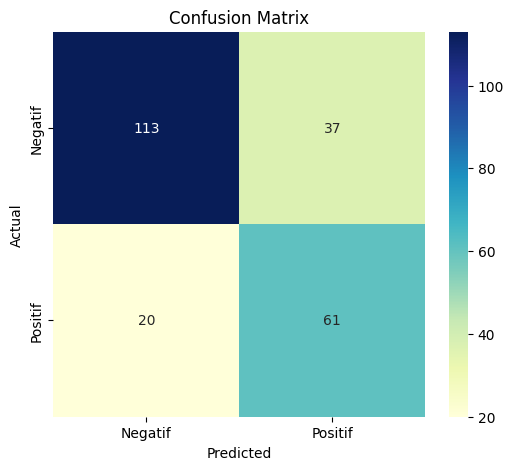

In [ ]:
# 11. Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            cmap='YlGnBu', xticklabels=["Negatif", "Positif"], yticklabels=["Negatif", "Positif"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

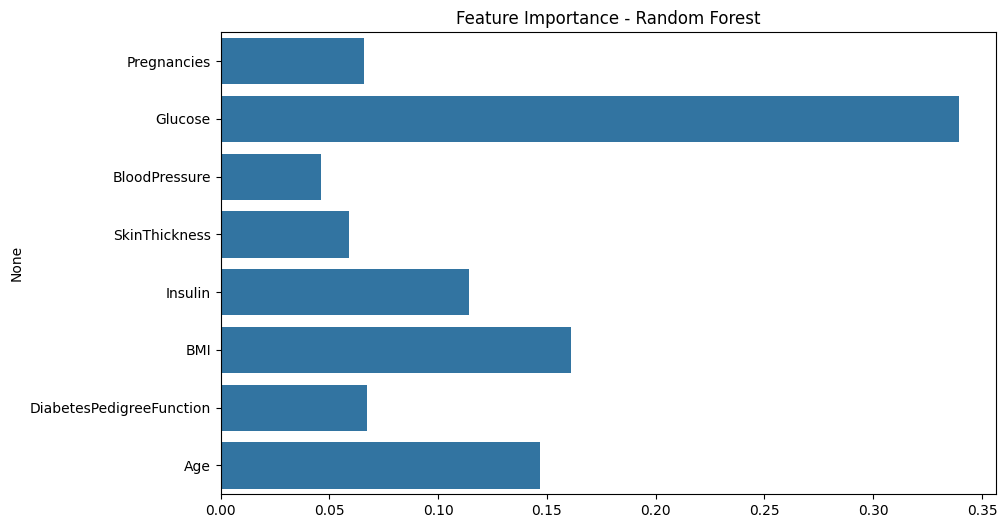

In [ ]:
# 12. Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title('Feature Importance - Random Forest')
plt.show()